## 병합과 조인
merge는 공통된 컬럼을 기준으로 공통된 값을 기준으로 두 테이블을 병합한다.  
주의점: 기준이 된 컬럼의 공통된 값으로 인하여 테이블의 크기가 변화할 수 있다!!

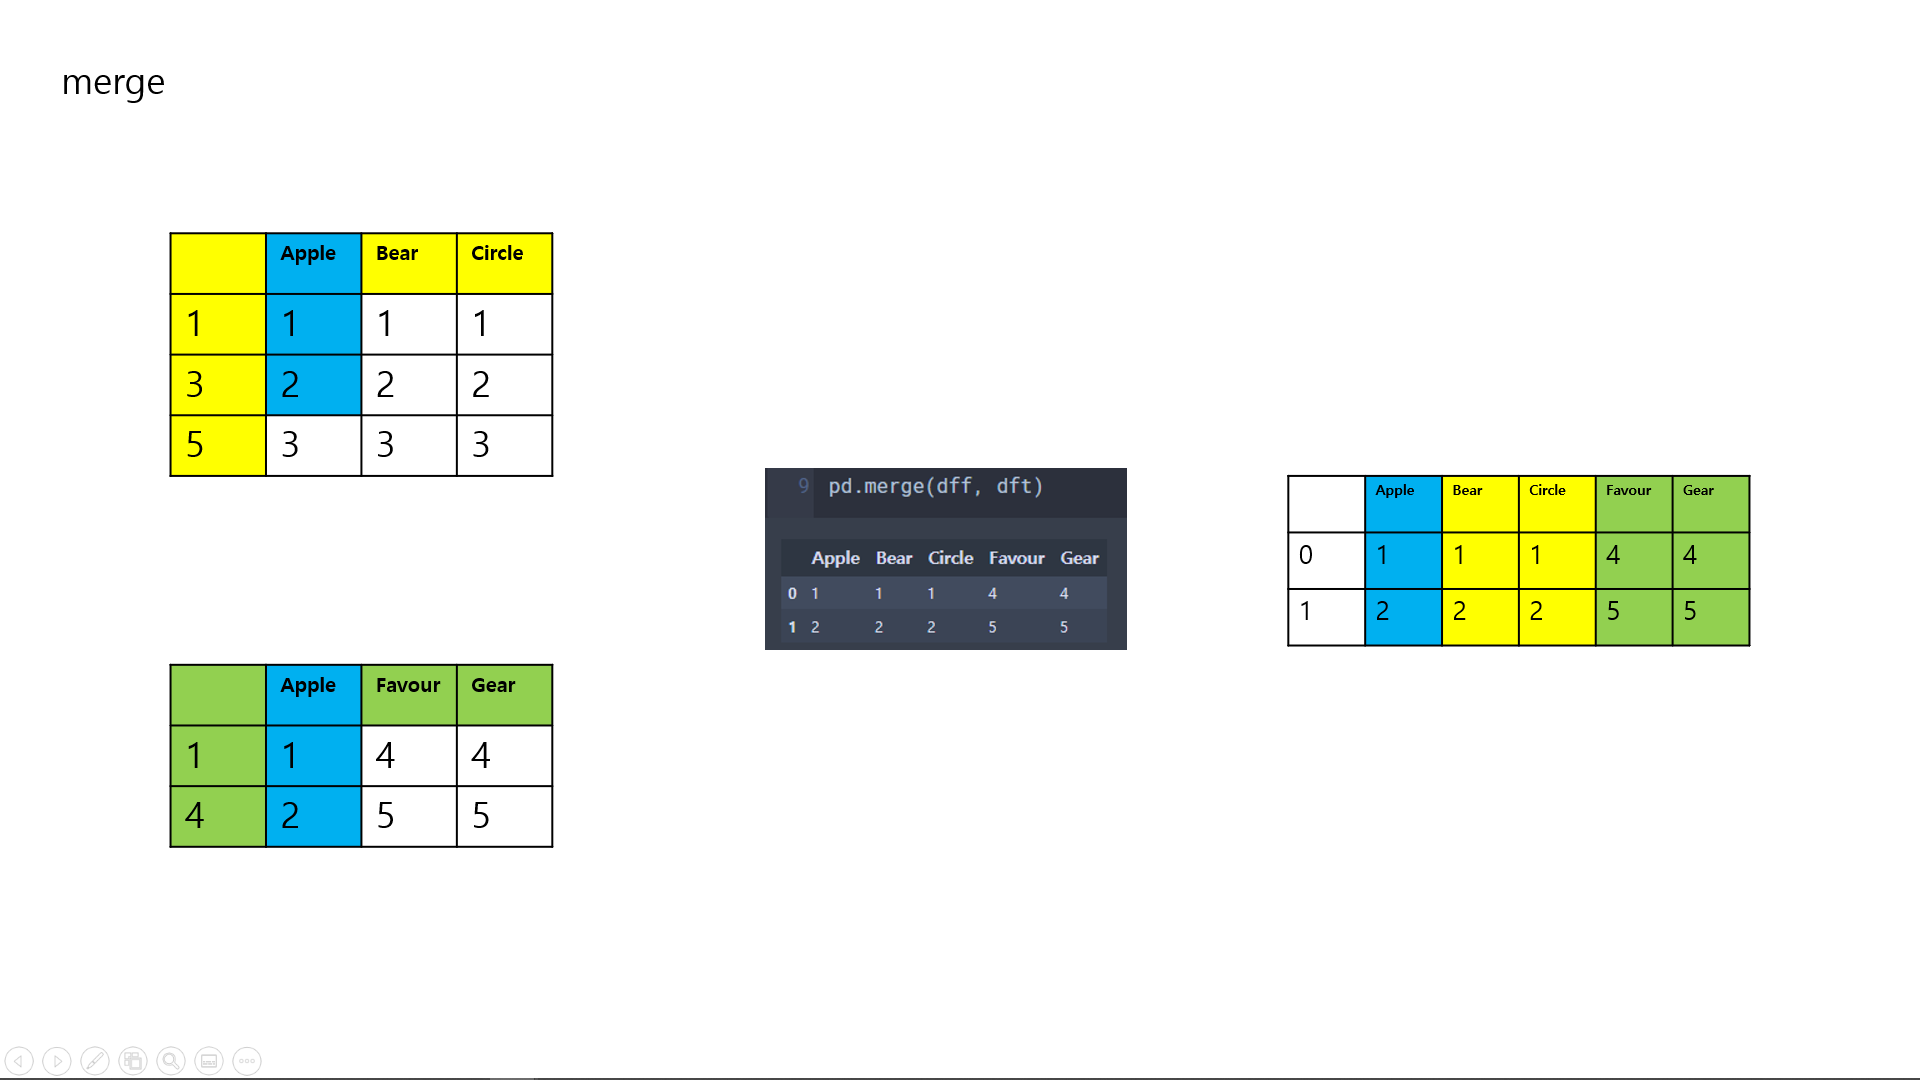

In [188]:
dff = pd.DataFrame({'Apple':[1, 2, 3],
                    'Bear':[1, 2, 3],
                    'Circle':[1, 2, 3]},
                    index = [1, 3, 5])
dft = pd.DataFrame({'Apple':[1, 2],
                    'Favour':[4, 5],
                    'Gear':[4, 5]},
                    index = [1, 4])
pd.merge(dff, dft)

,Apple,Bear,Circle,Favour,Gear
0,1,1,1,4,4
1,2,2,2,5,5


In [189]:
df1 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '학과':['경영학과','교육학과','컴퓨터학과','통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [190]:
df2 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '입학년도':[2012, 2016, 2019, 2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2019
3,김유신,2020


In [191]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [192]:
df_3 = pd.concat([df1, df2])
df_3

,학생,학과,입학년도
0,홍길동,경영학과,NaN
1,이순신,교육학과,NaN
2,임꺽정,컴퓨터학과,NaN
3,김유신,통계학과,NaN
0,홍길동,NaN,2012.0
1,이순신,NaN,2016.0
2,임꺽정,NaN,2019.0
3,김유신,NaN,2020.0


In [193]:
df4 = pd.DataFrame({'학과':['경영학과','교육학과','컴퓨터학과','통계학과'],
                    '학과장':['황희','장영실','안창호','정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [194]:
pd.merge(df3, df4)
# df3와 df4에 '학과'라는 공통된 컬럼이 있었기 때문에 merge가 가능

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [195]:
pd.concat([df3, df4], join='inner', axis=1)

,학생,학과,입학년도,학과,학과장
0,홍길동,경영학과,2012,경영학과,황희
1,이순신,교육학과,2016,교육학과,장영실
2,임꺽정,컴퓨터학과,2019,컴퓨터학과,안창호
3,김유신,통계학과,2020,통계학과,정약용


In [196]:
df5 = pd.DataFrame({'학과':['경영학과','교육학과','교육학과','컴퓨터학과','컴퓨터학과','통계학과'],
                    '과목':['경영학개론','기초수학','물리학','프로그래밍','운영체제','확률론']})
df5

,학과,과목
0,경영학과,경영학개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [197]:
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [198]:
df5

,학과,과목
0,경영학과,경영학개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [199]:
pd.merge(df1, df5)
# merge를 할 수 있는 조건은 공통된 column이 존재해야 한다는 것이다.
# df1과 df5의 공통 column은 '학과' column이다.
# df5는 학과를 기준으로 6개의 정보가 있지만
# df1은 학과를 기준으로 4개의 정보밖에 없다.
# concat과 달리 공통된 column에 대한 정보를 합집합 개념으로 모두 포함하여
# 두 테이블을 합친다.

,학생,학과,과목
0,홍길동,경영학과,경영학개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


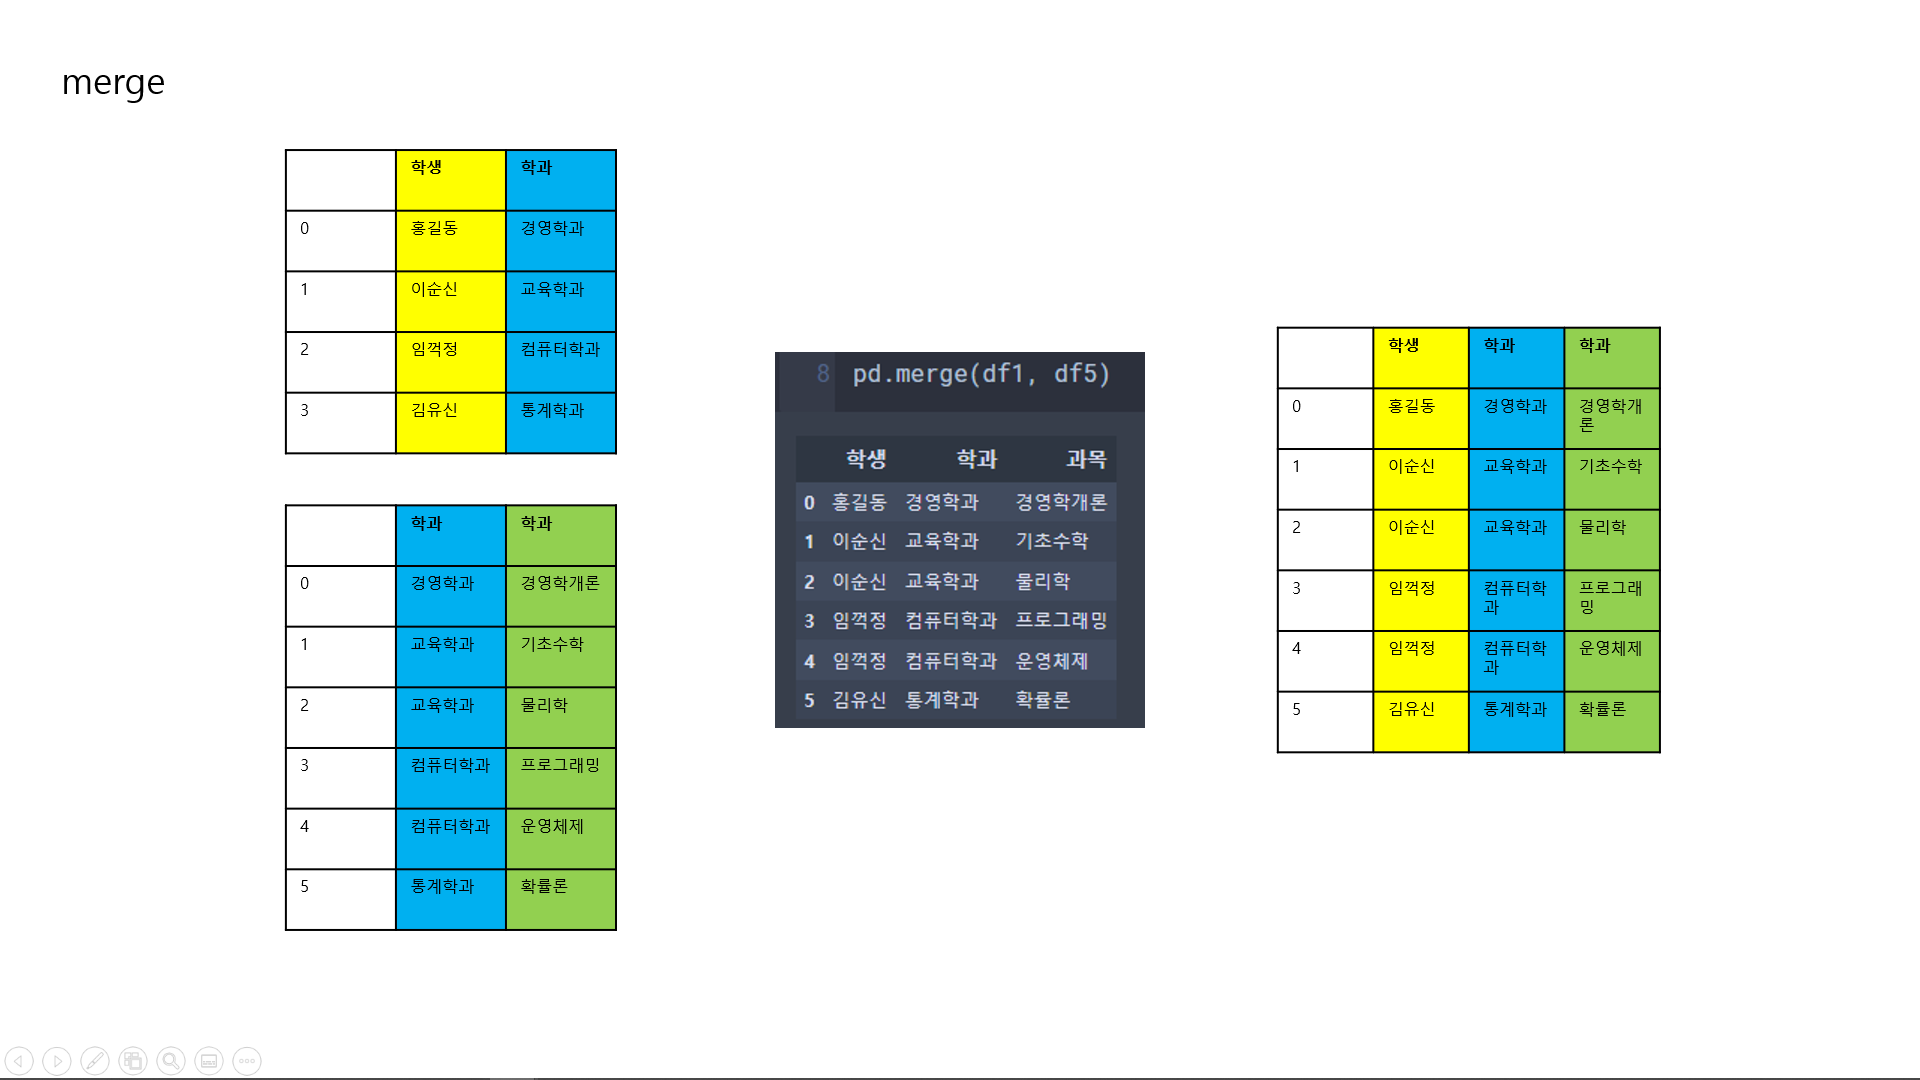

In [200]:
pd.concat([df1, df5])

,학생,학과,과목
0,홍길동,경영학과,NaN
1,이순신,교육학과,NaN
2,임꺽정,컴퓨터학과,NaN
3,김유신,통계학과,NaN
0,NaN,경영학과,경영학개론
1,NaN,교육학과,기초수학
2,NaN,교육학과,물리학
3,NaN,컴퓨터학과,프로그래밍
4,NaN,컴퓨터학과,운영체제
5,NaN,통계학과,확률론


In [201]:
pd.merge(df1, df5, on='학과')

,학생,학과,과목
0,홍길동,경영학과,경영학개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [202]:
pd.merge(df1, df2)

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [203]:
df6 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                    '성적':['A','A+','B','A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [204]:
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


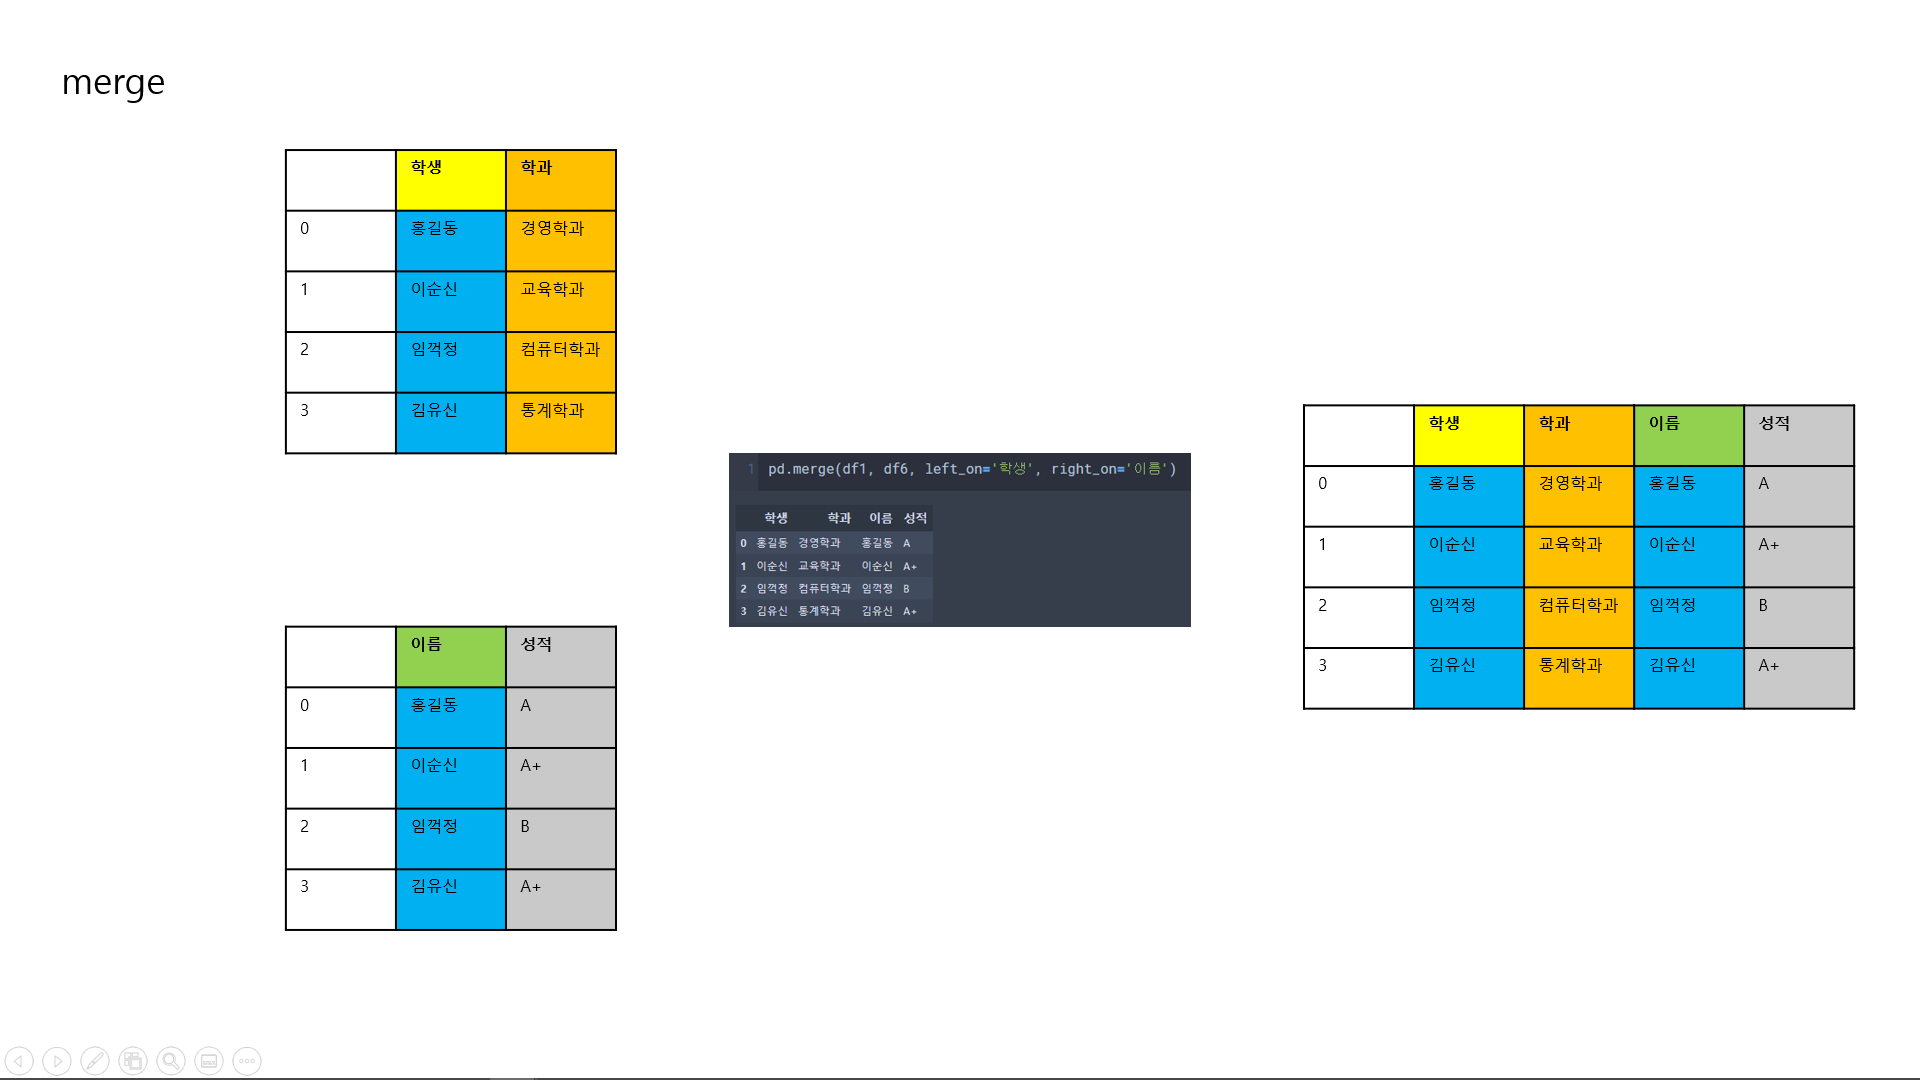

In [205]:
pd.merge(df1, df6, left_on='학생', right_on='이름')
# 같은 값이 존재하지만 columns명이 다를 때 left_on과 right_on을 써서 강제적으로 붙여줄 수 있다.

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


### 공통된 index가 있는 두 테이블을 합치기
공통된 index가 있는 두 테이블을 합치는 방법엔 두가지 방법이 있다.  
1. pd.merge에서 left_index=True, right_on='colunm명'을 쓰는 방법과  
2. table1.join(table2)가 있다.  
  
그러나 이 두 가지 방법 모두 공통된 index가 존재하여야 한다.

In [206]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [207]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [208]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2019
김유신,2020


In [209]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [210]:
book = pd.DataFrame({'제목':['기계학습','현대통계학', '알고리즘 입문', '태블로'],
                     '가격':[50000, 15000, 30000, 12000]})
book

,제목,가격
0,기계학습,50000
1,현대통계학,15000
2,알고리즘 입문,30000
3,태블로,12000


In [211]:
publisher = pd.DataFrame({'제목':['기계학습','현대통계학', '알고리즘 입문', '태블로'],
                          '출판사':['한빛아카데미','다산출판사','이지스퍼블리싱','태블로']})
publisher

,제목,출판사
0,기계학습,한빛아카데미
1,현대통계학,다산출판사
2,알고리즘 입문,이지스퍼블리싱
3,태블로,태블로


In [212]:
book1 = book.set_index('제목')
book1

,가격
제목,
기계학습,50000
현대통계학,15000
알고리즘 입문,30000
태블로,12000


In [213]:
publisher2 = publisher.set_index('제목')
publisher2

,출판사
제목,
기계학습,한빛아카데미
현대통계학,다산출판사
알고리즘 입문,이지스퍼블리싱
태블로,태블로


In [214]:
pd.merge(book1, publisher2, left_index=True, right_on='제목')

,가격,출판사
제목,,
기계학습,50000,한빛아카데미
현대통계학,15000,다산출판사
알고리즘 입문,30000,이지스퍼블리싱
태블로,12000,태블로


In [215]:
running_score = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                              '달리기 기록':[9.14, 9.06, 8.94, 9.65, 8.99]})
r_i = running_score.set_index('학생')
r_i

,달리기 기록
학생,
철수,9.14
바둑이,9.06
강철,8.94
철민,9.65
민수,8.99


In [216]:
metal_pole = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                           '철봉 기록':[15.77, 17.88, 14.22, 16.41, 21.19]})
m_i = metal_pole.set_index('학생')
m_i

,철봉 기록
학생,
철수,15.77
바둑이,17.88
강철,14.22
철민,16.41
민수,21.19


In [217]:
football_score = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                               '골인 기록':[5, 3, 4, 5, 1]})
f_i = football_score.set_index('학생')
f_i

,골인 기록
학생,
철수,5
바둑이,3
강철,4
철민,5
민수,1


In [218]:
t_i = pd.merge(r_i, m_i, left_index=True, right_on='학생')
t_i

,달리기 기록,철봉 기록
학생,,
철수,9.14,15.77
바둑이,9.06,17.88
강철,8.94,14.22
철민,9.65,16.41
민수,8.99,21.19


In [219]:
r_i.join(m_i)

,달리기 기록,철봉 기록
학생,,
철수,9.14,15.77
바둑이,9.06,17.88
강철,8.94,14.22
철민,9.65,16.41
민수,8.99,21.19


In [220]:
t_t = pd.merge(t_i, f_i, left_index=True, right_on='학생')
t_t

,달리기 기록,철봉 기록,골인 기록
학생,,,
철수,9.14,15.77,5
바둑이,9.06,17.88,3
강철,8.94,14.22,4
철민,9.65,16.41,5
민수,8.99,21.19,1


In [221]:
t_i.join(f_i)

,달리기 기록,철봉 기록,골인 기록
학생,,,
철수,9.14,15.77,5
바둑이,9.06,17.88,3
강철,8.94,14.22,4
철민,9.65,16.41,5
민수,8.99,21.19,1


In [222]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [223]:
pd.merge(mdf1, df6, left_index = True, right_on='이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,A+


In [224]:
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [225]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


### inner /  outer join

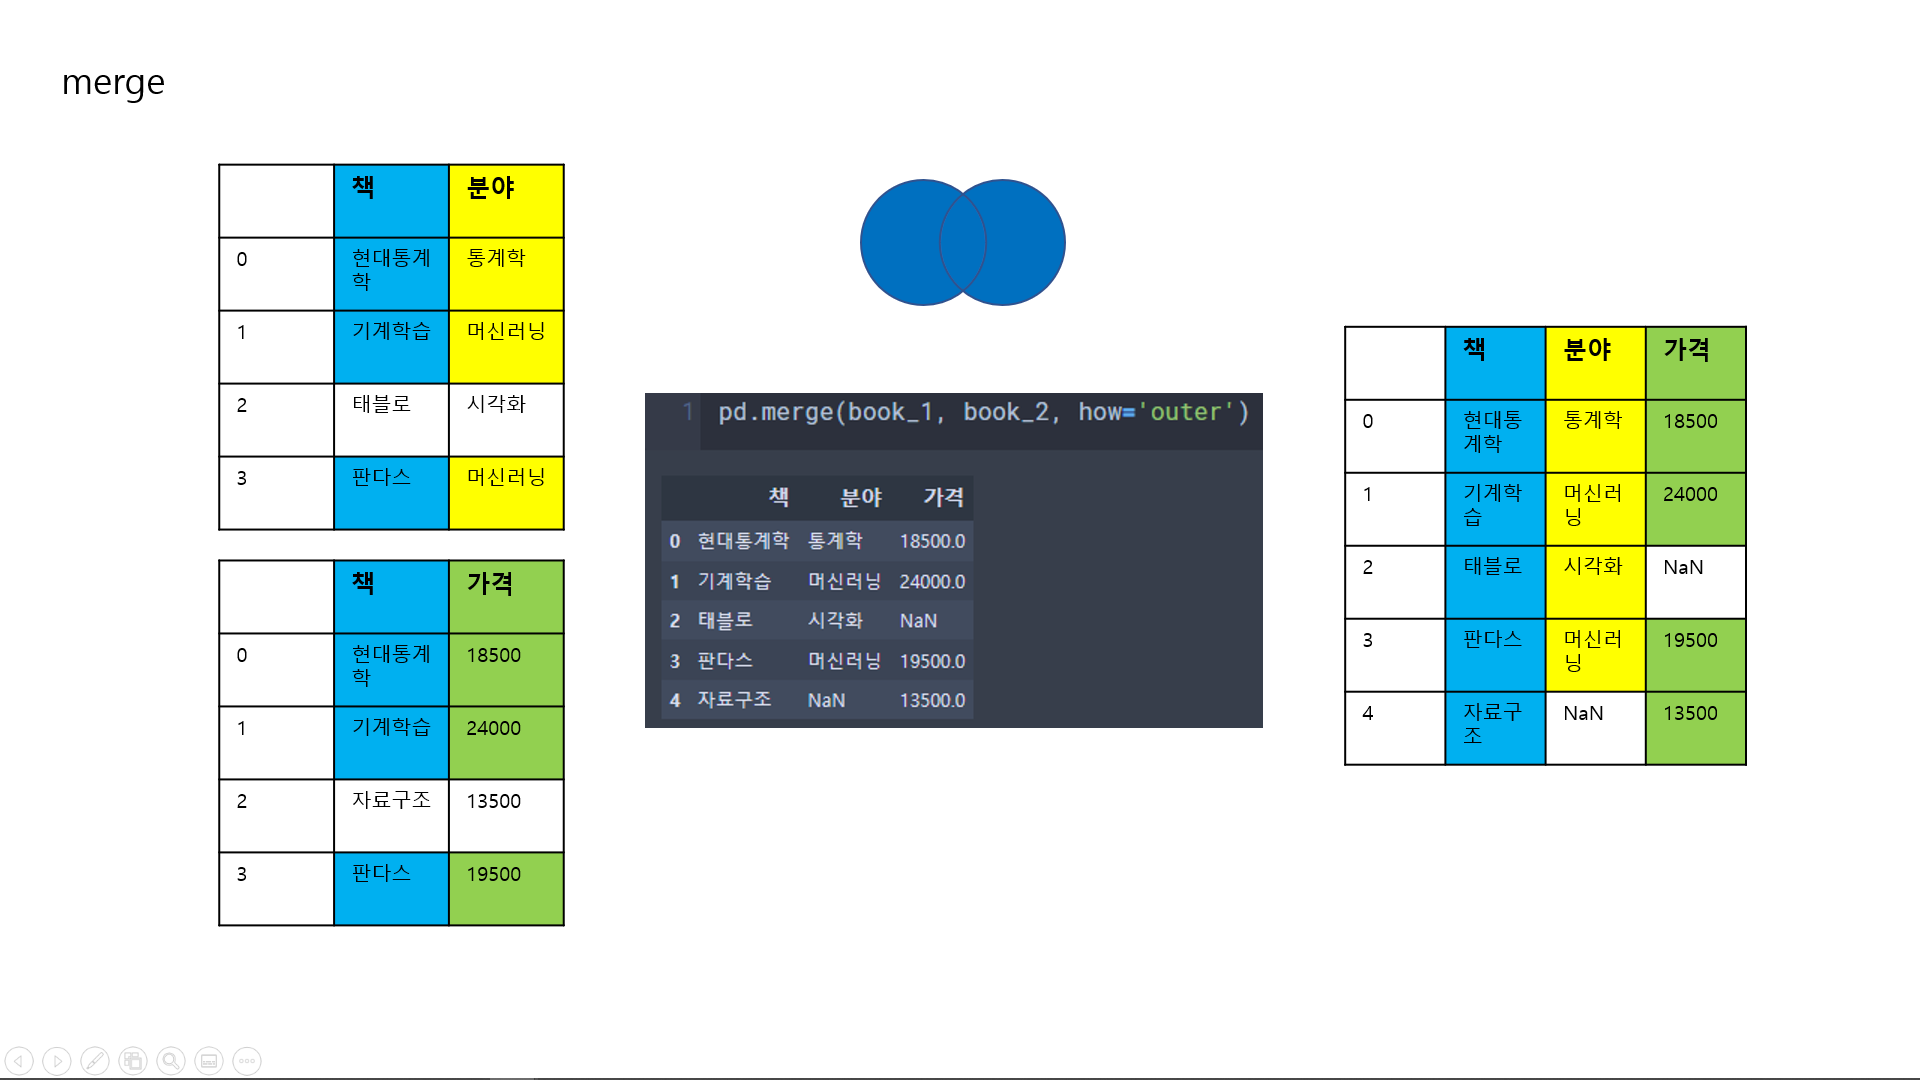

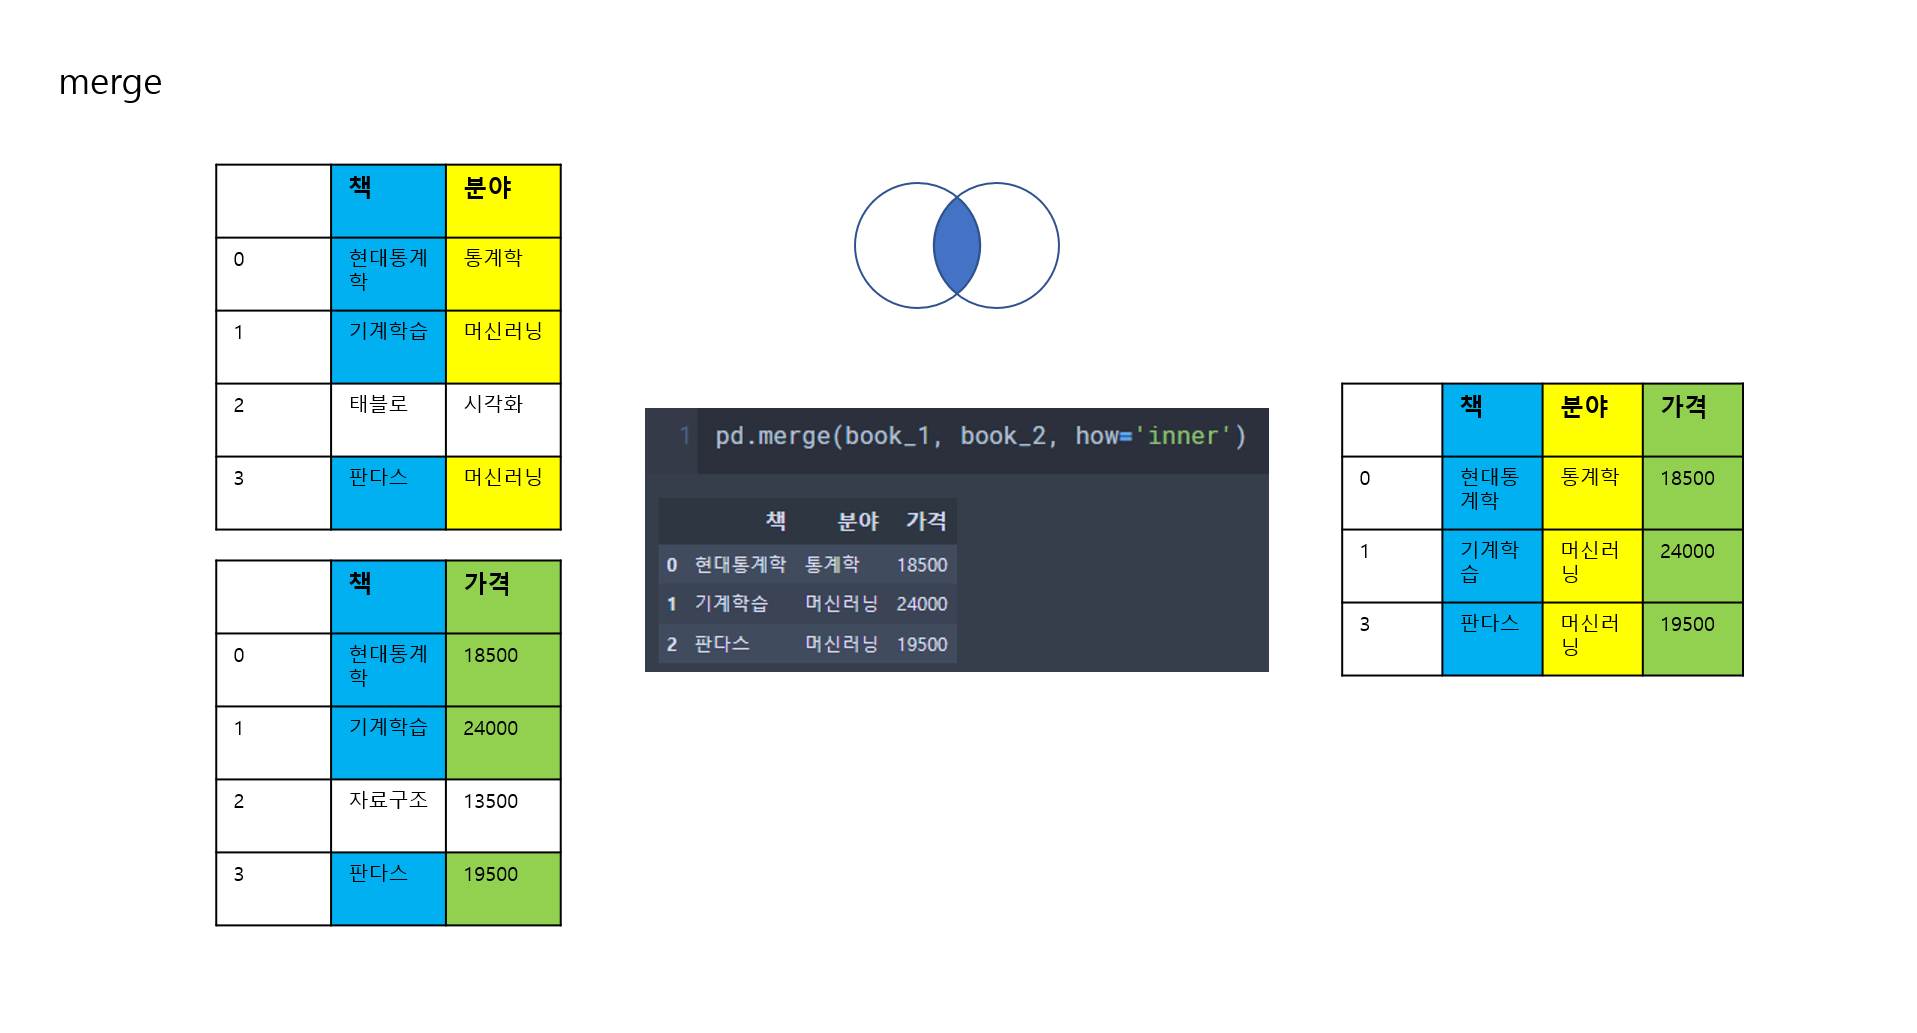

In [226]:
df7 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정'],
                    '주문음식':['햄버거','피자','짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [227]:
df8 = pd.DataFrame({'이름':['홍길동','이순신','김유신'],
                    '주문음료':['콜라','사이다','커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [228]:
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [229]:
pd.merge(df7, df8, how='inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [230]:
pd.merge(df7, df8, how='outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [231]:
pd.concat([df7, df8])

,이름,주문음식,주문음료
0,홍길동,햄버거,NaN
1,이순신,피자,NaN
2,임꺽정,짜장면,NaN
0,홍길동,NaN,콜라
1,이순신,NaN,사이다
2,김유신,NaN,커피


In [232]:
book_1 = pd.DataFrame({'책':['현대통계학','기계학습','태블로','판다스'],
                       '분야':['통계학','머신러닝','시각화','머신러닝']})
book_1

,책,분야
0,현대통계학,통계학
1,기계학습,머신러닝
2,태블로,시각화
3,판다스,머신러닝


In [233]:
book_2 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '가격':[18500, 24000, 13500, 19500]})
book_2

,책,가격
0,현대통계학,18500
1,기계학습,24000
2,자료구조,13500
3,판다스,19500


In [234]:
pd.merge(book_1, book_2, how='inner')

,책,분야,가격
0,현대통계학,통계학,18500
1,기계학습,머신러닝,24000
2,판다스,머신러닝,19500


In [235]:
pd.merge(book_1, book_2, how='outer')

,책,분야,가격
0,현대통계학,통계학,18500.0
1,기계학습,머신러닝,24000.0
2,태블로,시각화,NaN
3,판다스,머신러닝,19500.0
4,자료구조,NaN,13500.0


### left / right 

In [236]:
pd.merge(book_1, book_2, how='left')

,책,분야,가격
0,현대통계학,통계학,18500.0
1,기계학습,머신러닝,24000.0
2,태블로,시각화,NaN
3,판다스,머신러닝,19500.0


In [237]:
pd.merge(book_1, book_2, how='right')

,책,분야,가격
0,현대통계학,통계학,18500
1,기계학습,머신러닝,24000
2,자료구조,NaN,13500
3,판다스,머신러닝,19500


In [238]:
pd.merge(df7,df8, how='left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [239]:
pd.merge(df7, df8, how='right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


### on / suffixes

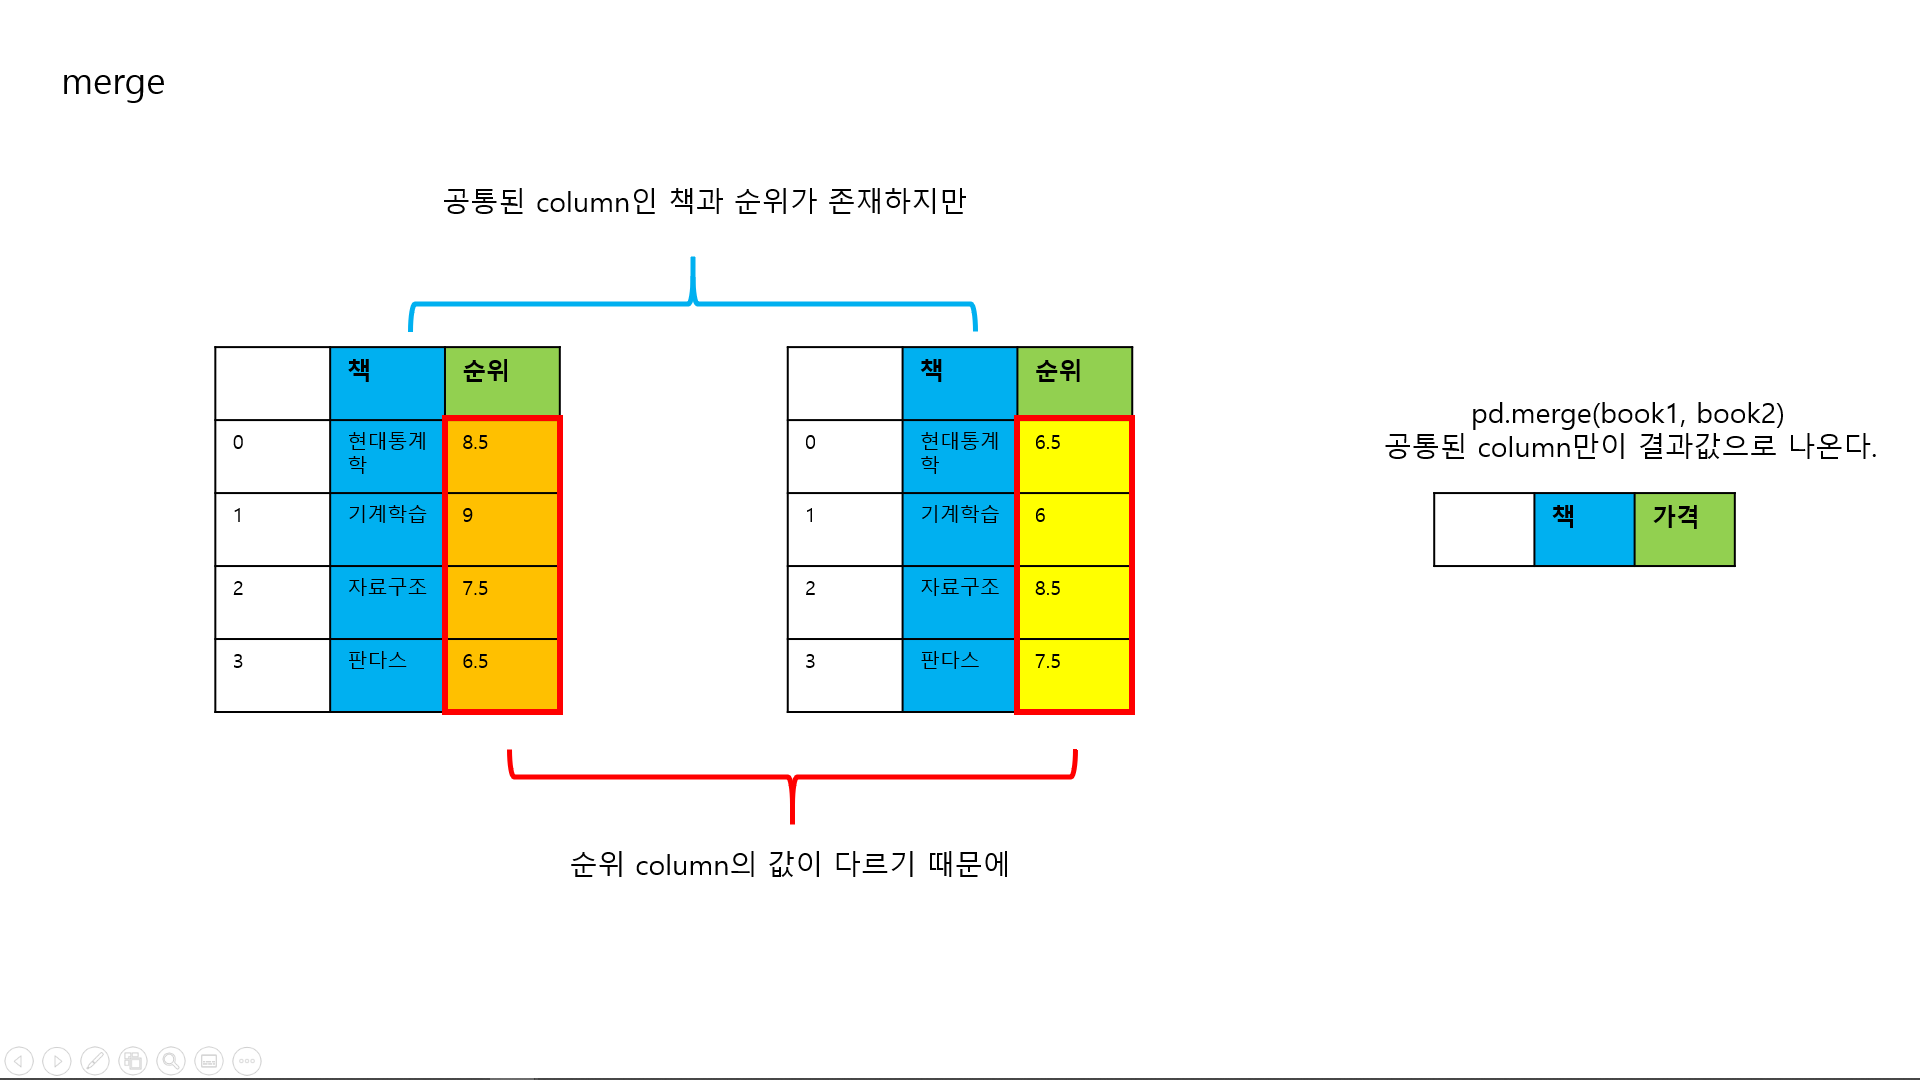

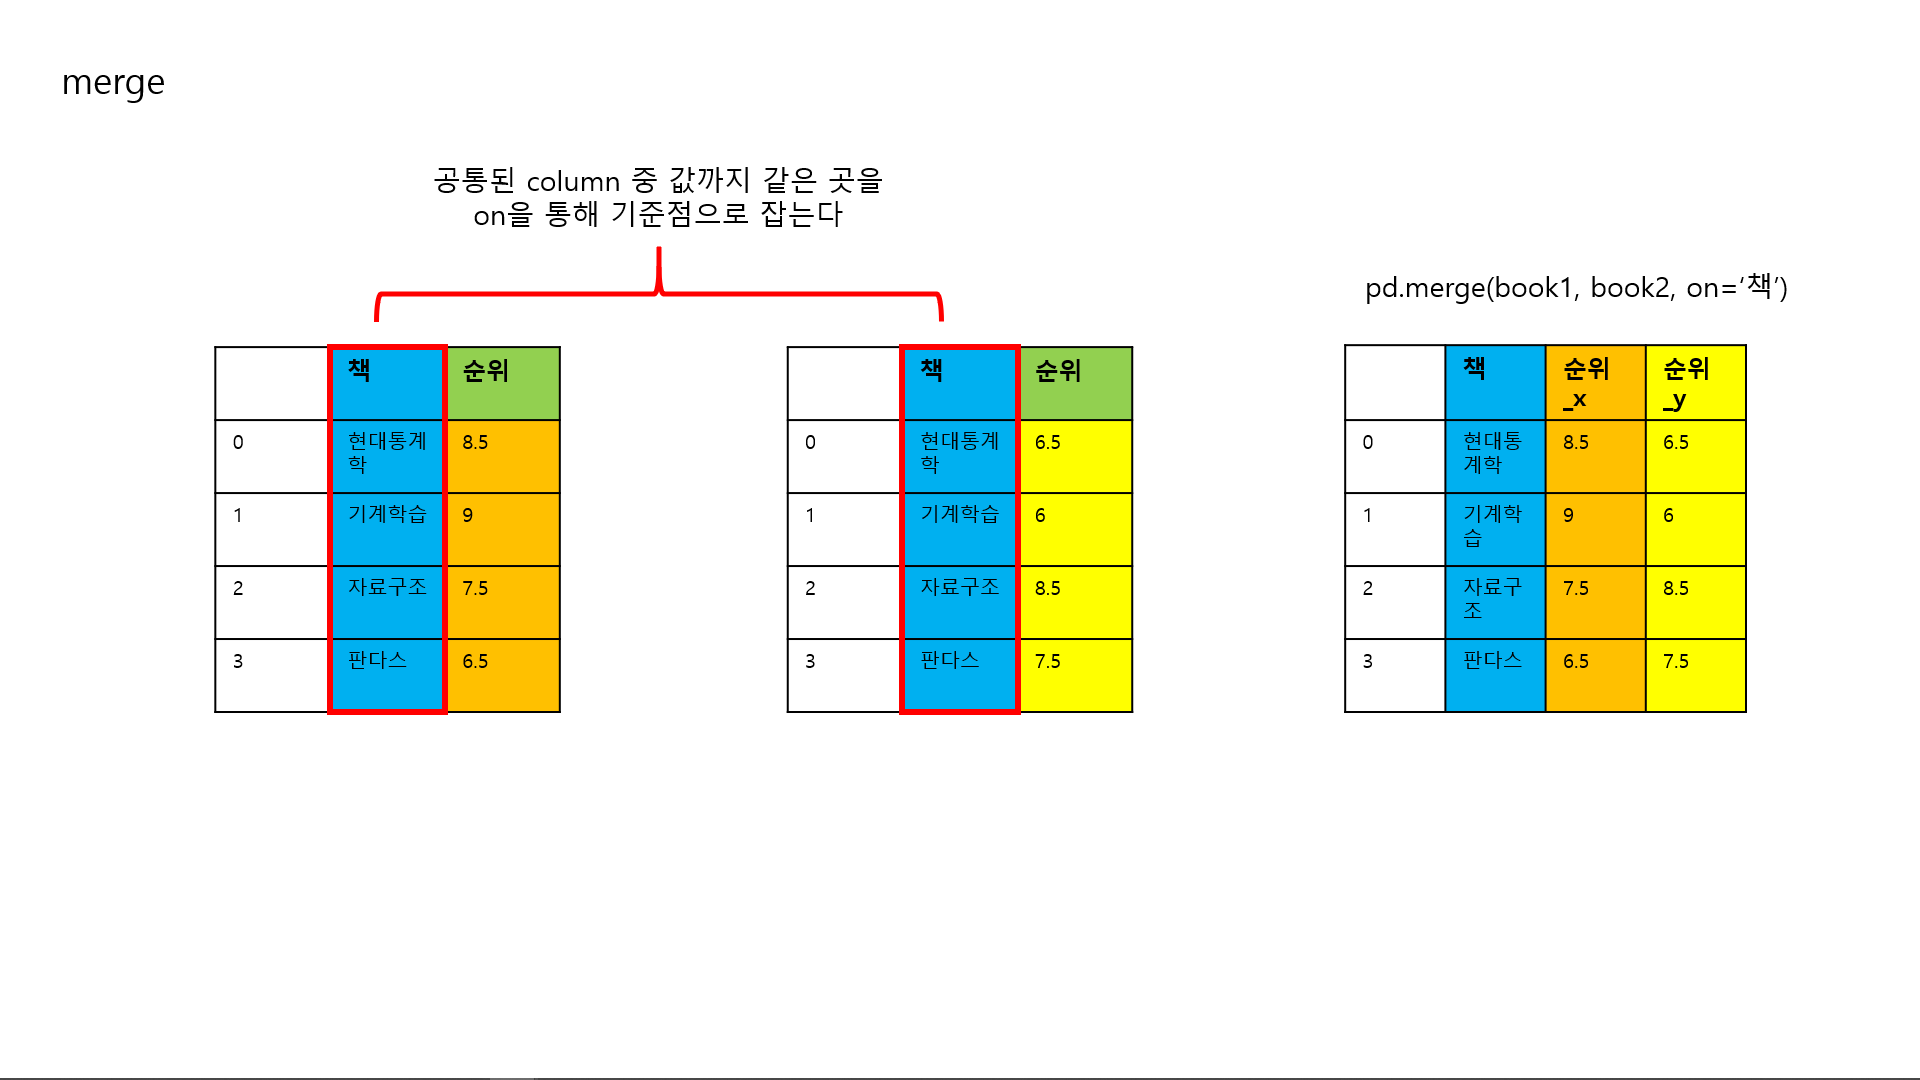

In [240]:
df9 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                    '순위':[3,2,4,1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [241]:
df10 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                     '순위':[4, 1, 3, 2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임꺽정,3
3,김유신,2


In [242]:
pd.merge(df9, df10, on='이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [243]:
pd.merge(df9, df10, on='이름', suffixes=['_인기','_성적'])

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [244]:
book_3 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '순위':[6.5, 6, 8.5, 7.5]})
book_3

,책,순위
0,현대통계학,6.5
1,기계학습,6.0
2,자료구조,8.5
3,판다스,7.5


In [245]:
book_4 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '순위':[8.5, 9, 7.5, 6.5]})
book_4

,책,순위
0,현대통계학,8.5
1,기계학습,9.0
2,자료구조,7.5
3,판다스,6.5


In [246]:
pd.merge(book_3, book_4, on='책')

,책,순위_x,순위_y
0,현대통계학,6.5,8.5
1,기계학습,6.0,9.0
2,자료구조,8.5,7.5
3,판다스,7.5,6.5


In [247]:
pd.merge(book_3, book_4, on='책', suffixes=['_독자', '_전문가'])

,책,순위_독자,순위_전문가
0,현대통계학,6.5,8.5
1,기계학습,6.0,9.0
2,자료구조,8.5,7.5
3,판다스,7.5,6.5
